# Loading the libraries

In [2]:
import os # For Directories iterations
from PIL import Image # For Image manupulation
import random # For randomly shuffle the dataset
import numpy as np # For array manupulations
import matplotlib.pyplot as plt # For data visualizations
from sklearn.preprocessing import LabelEncoder # For encoding the labels into numbers

import torch # For model displaying 
import torch.nn as nn # For neural network making
from torch.utils.data import Dataset # For dataset preprations
from torch.utils.data import DataLoader # For dataset loading form for the model

# Loading the dataset 

## How the os module works
* provides functions for interacting with the operating system
* os.listdir() takes specified directory as argument and returns list of all its files and directories
* os.path.join() joins one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component. If the last path component to be joined is empty then a directory separator (‘/’) is put at the end. If a path component represents an absolute path, then all previous components joined are discarded and joining continues from the absolute path component.

## How Image module of PIL (python image library) works
* Image.open() takes image file as argument, then opens and identifies it
    * image is not actually read (aquire and placed into RAM) until data is processed (below, when .convert() is called)
* Image.convert('RGB') returns a converted copy of an image in RGB
* numpy.flatten() returns a copy of an given array collapsed into one dimension

## Summary
* images opened with pillow 
* converted to numpy array (3D since they're described by RGB values at each pixel)
* dividing each image by 255 normalizes the data so each pixel is a value from 0 to 1
* flattened and then appended to train/test lists. X is the images and y are their labels

In [3]:
data_dir = "./gaborpatch"

X_train = []
y_train = []

X_test = []
y_test = []

for folder in os.listdir(data_dir):
  for c in os.listdir(os.path.join(data_dir, folder)):
    for im_name in os.listdir(os.path.join(data_dir, folder, c)):
      img_path = os.path.join(data_dir, folder, c, im_name)
      image = Image.open(img_path).convert('RGB')
      
      # normalize the data
      image = np.array(image) / 255
      print(f"Loaded image: {im_name} Shape: {image.shape}")
      
    
      if folder == 'train':
        X_train.append(image.flatten())
        y_train.append(c)
      else:
        X_test.append(image.flatten())
        y_test.append(c)

Loaded image: img_35_0.15.png Shape: (96, 96, 3)
Loaded image: img_35_0.1.png Shape: (96, 96, 3)
Loaded image: img_35_0.06.png Shape: (96, 96, 3)
Loaded image: img_35_0.04.png Shape: (96, 96, 3)
Loaded image: img_35_0.08.png Shape: (96, 96, 3)
Loaded image: img_95_0.08.png Shape: (96, 96, 3)
Loaded image: img_95_0.15.png Shape: (96, 96, 3)
Loaded image: img_95_0.1.png Shape: (96, 96, 3)
Loaded image: img_95_0.06.png Shape: (96, 96, 3)
Loaded image: img_95_0.04.png Shape: (96, 96, 3)
Loaded image: img_35_0.13.png Shape: (96, 96, 3)
Loaded image: img_35_0.09.png Shape: (96, 96, 3)
Loaded image: img_35_0.05.png Shape: (96, 96, 3)
Loaded image: img_95_0.13.png Shape: (96, 96, 3)
Loaded image: img_95_0.09.png Shape: (96, 96, 3)
Loaded image: img_95_0.05.png Shape: (96, 96, 3)


# Displaying some of the training images

* random.choices() returns a list with the randomly selected element from the specified sequence, k is length of returned list
* plt.subplot() takes three arguments that describes the layout of the figure, organized in rows and columns, which are represented by the first and second argument. The third argument represents the index of the current plot

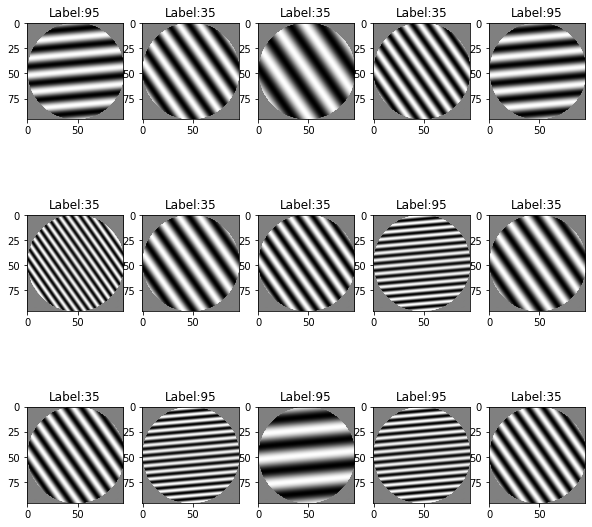

In [4]:
# plot random 15 images (with replacement) in your train dataset with their labels
names = random.choices(range(len(X_train)), k=15)

plt.figure(figsize = (10, 10))
for n, name in enumerate(names):
  plt.subplot(3, 5, n+1)
  plt.title("Label:" + y_train[name])
  img = np.reshape(X_train[name], (96,96,3))
  plt.imshow(img)

# Preprocessing the train and test dataset

* Our train and test data looks like a list of numpy arrays, so we have to convert them to numpy arrays via np.array()

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Total Train: ", X_train.shape)
print("Total Test: ", X_test.shape)

Total Train:  (10, 27648)
Total Test:  (6, 27648)


# Encoding the labels into numbers

* each label must be transformed to numeric for deep learning
* next we standardize our training data then use those parameters to standardize the test data

In [6]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Dataset loader for the images and labels

In [7]:
class Data(Dataset):
  def __init__(self, X_train, y_train):
    
    self.X = torch.from_numpy(X_train.astype(np.float32))
    self.y = torch.from_numpy(y_train).type(torch.LongTensor)
    self.len = self.X.shape[0]
  
  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

traindata = Data(X_train, y_train)
traindata[:3]

(tensor([[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020]]),
 tensor([0, 0, 0]))

# Models Hyperparameters

In [8]:
batch_size = 1
input_dim = 27648
hidden_layers = 5000
output_dim = 2
epochs = 20

# Making the DataLoader for the model

In [9]:
trainloader = DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=2)

In [10]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.linear1 = nn.Linear(input_dim, hidden_layers)
    self.linear2 = nn.Linear(hidden_layers, output_dim)

  def forward(self, x):
      x = torch.sigmoid(self.linear1(x))
      x = self.linear2(x)
      return x

In [11]:
clf = Network()
clf.parameters

<bound method Module.parameters of Network(
  (linear1): Linear(in_features=27648, out_features=5000, bias=True)
  (linear2): Linear(in_features=5000, out_features=2, bias=True)
)>

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(clf.parameters(), lr=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [13]:
e = []
loss_rate = []

for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    # set optimizer to zero grad to remove previous epoch gradients
    optimizer.zero_grad()
    
    # forward propagation
    outputs = clf(inputs)
    loss = criterion(outputs, labels)
    
    # backward propagation
    loss.backward()
    
    # optimize
    optimizer.step()
    running_loss += loss.item()
  
  # display statistics
  print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.5f}') 

  e.append(epoch)
  loss_rate.append(running_loss)

[1,    10] loss: 0.00450
[2,    10] loss: 0.00600
[3,    10] loss: 0.00532
[4,    10] loss: 0.00351
[5,    10] loss: 0.00434
[6,    10] loss: 0.00402
[7,    10] loss: 0.00418
[8,    10] loss: 0.00398
[9,    10] loss: 0.00282
[10,    10] loss: 0.00364
[11,    10] loss: 0.00380
[12,    10] loss: 0.00310
[13,    10] loss: 0.00277
[14,    10] loss: 0.00304
[15,    10] loss: 0.00257
[16,    10] loss: 0.00292
[17,    10] loss: 0.00264
[18,    10] loss: 0.00237
[19,    10] loss: 0.00235
[20,    10] loss: 0.00207


# Model Training Losses

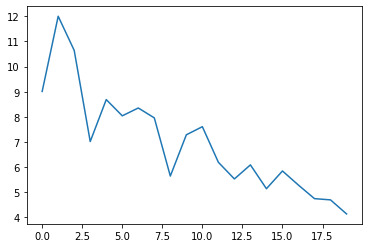

In [14]:
plt.plot(loss_rate)

# Saving the model

In [15]:
# save the trained model
PATH = './mymodel.pth'
torch.save(clf.state_dict(), PATH)

# Testing model over test dataset

In [16]:
testdata = Data(X_test, y_test)
testloader = DataLoader(testdata, batch_size=batch_size, shuffle=True, num_workers=2)

# Preidiction over test dataset

Accuracy of the network on the 6 test data: 50 %


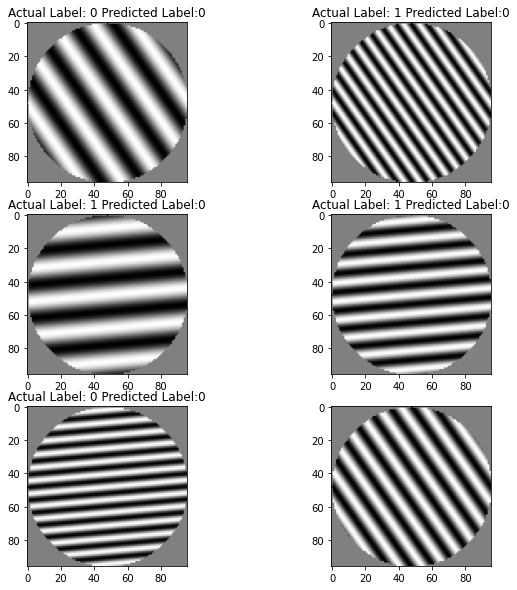

In [17]:
correct, total = 0, 0

plt.figure(figsize = (10,10))
n = 0

# no need to calculate gradients during inference
with torch.no_grad():
  for data in testloader:
    inputs, labels = data
    
    # calculate output by running through the network
    outputs = clf(inputs)
    
    # get the predictions
    __, predicted = torch.max(outputs.data, 1)
    
    # For the image plotting
    input_image = inputs.numpy()[0].reshape((96,96,3))
    actual_label = labels.tolist()[0]
    pred_label = predicted.tolist()[0]

    plt.title(f"Actual Label: {actual_label} Predicted Label:{pred_label}")
    plt.subplot(3, 2, n+1)
    plt.imshow(input_image)

    # update results
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    n+=1

print(f'Accuracy of the network on the {len(testdata)} test data: {100 * correct // total} %')